100%|██████████| 1000/1000 [00:31<00:00, 31.89it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/paul/Desktop/Uni/cls/complex_systems/src/data/test.png'

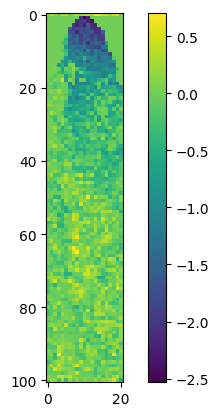

In [ ]:
from CA import *
from initial_state_generation import generate_initial_slope
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Example usage
    np.random.seed(42)
    width, height, ground_height = 21, 101, 101*.1
    
    initial_state = generate_initial_slope(height, width, ground_height, noise_amplitude = 0.2, noise_type = 'white')
    
    output_file = '../videos/water_simulation.mp4'
    ca = CA(width, height, initial_state, neighbor_list=BOTTOM_NEIGHBORS)
    ca.run_simulation(1000, show_live=False)
    
    plt.imshow(ca.grid[:,:,GROUND_HEIGHT] - initial_state[:,:,GROUND_HEIGHT])
    plt.colorbar()
    
    plt.savefig('../data/test.png')
    
    